In [ ]:
!pip install timm torchvision --quiet
!pip install -U huggingface_hub --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.1 MB/s eta 0:00:00


In [ ]:
from google.colab import files
from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F
import os
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [ ]:
import torch
from huggingface_hub import snapshot_download

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

repo_id = "viet2004kb/efficientnetb1-fromscratch-fake-face-v2"
model_dir = snapshot_download(repo_id)

import timm
model = timm.create_model("efficientnet_b1", pretrained=False, num_classes=2)
model.load_state_dict(torch.load(f"{model_dir}/pytorch_model.bin", map_location=device))
model.to(device)
model.eval()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/63.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/26.5M [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

EfficientNet(
  (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNormAct2d(
          32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (aa): Identity()
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2

Saving tu noi dong xanh.gif to tu noi dong xanh (1).gif


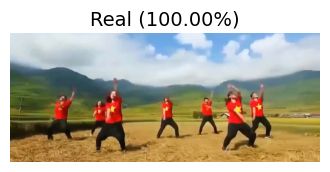

In [19]:
# Upload ảnh từ máy
uploaded = files.upload()
transform = transforms.Compose([
    transforms.Resize((240, 240)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

for filename in uploaded.keys():
    img = Image.open(filename).convert("RGB")
    input_tensor = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        prob = F.softmax(output, dim=1)
        pred_class = torch.argmax(prob, dim=1).item()
        confidence = prob[0][pred_class].item()

    label = "Fake" if pred_class == 0 else "Real"
    title = f"{label} ({confidence:.2%})"

    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()


In [ ]:
import requests
from PIL import Image
from io import BytesIO
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()


total = 100
correct = 0
transform = transforms.Compose([
    transforms.Resize((240, 240)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

print("🔍 Bắt đầu kiểm tra 100 ảnh từ thispersondoesnotexist.com...\n")

for i in range(total):
    try:
        url = "https://thispersondoesnotexist.com"
        response = requests.get(url, timeout=5)
        img = Image.open(BytesIO(response.content)).convert("RGB")

        input_tensor = transform(img).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(input_tensor)
            prob = F.softmax(output, dim=1)
            pred_class = torch.argmax(prob, dim=1).item()
            real_prob = prob[0][1].item()
            fake_prob = prob[0][0].item()

        label = "Fake" if pred_class == 0 else "Real"
        if label == "Fake":
            correct += 1

        print(f"[{i+1:02d}] Dự đoán: {label} | Tỉ lệ Fake: {fake_prob:.2%} - Real: {real_prob:.2%}")

        time.sleep(1)

    except Exception as e:
        print(f"[{i+1:02d}] ❌ Lỗi: {e}")

accuracy = correct / total * 100
print(f"\n🎯 Mô hình nhận diện đúng {correct}/{total} ảnh là FAKE")
print(f"✅ Tỷ lệ chính xác tổng thể: {accuracy:.2f}%")


🔍 Bắt đầu kiểm tra 100 ảnh từ thispersondoesnotexist.com...

[01] Dự đoán: Fake | Tỉ lệ Fake: 99.70% - Real: 0.30%
[02] Dự đoán: Fake | Tỉ lệ Fake: 94.13% - Real: 5.87%
[03] Dự đoán: Fake | Tỉ lệ Fake: 99.77% - Real: 0.23%
[04] Dự đoán: Fake | Tỉ lệ Fake: 100.00% - Real: 0.00%
[05] Dự đoán: Fake | Tỉ lệ Fake: 99.94% - Real: 0.06%
[06] Dự đoán: Fake | Tỉ lệ Fake: 99.68% - Real: 0.32%
[07] Dự đoán: Fake | Tỉ lệ Fake: 95.00% - Real: 5.00%
[08] Dự đoán: Fake | Tỉ lệ Fake: 100.00% - Real: 0.00%
[09] Dự đoán: Fake | Tỉ lệ Fake: 100.00% - Real: 0.00%
[10] Dự đoán: Fake | Tỉ lệ Fake: 99.12% - Real: 0.88%

🎯 Mô hình nhận diện đúng 10/10 ảnh là FAKE
✅ Tỷ lệ chính xác tổng thể: 100.00%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

input_dir = '/content/drive/MyDrive/Bigdata/Insource/Fake'


transform = transforms.Compose([
    transforms.Resize((240, 240)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])


index = 1
real_count = 0
fake_count = 0
total = 0


for filename in sorted(os.listdir(input_dir)):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.webp')):
        filepath = os.path.join(input_dir, filename)

        try:
            img = Image.open(filepath).convert("RGB")
        except Exception as e:
            print(f"[{index}] Lỗi khi mở ảnh {filename}: {e}")
            index += 1
            continue

        input_tensor = transform(img).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(input_tensor)
            prob = F.softmax(output, dim=1)[0]  # Xác suất lớp 0 và 1

        fake_prob = prob[0].item() * 100
        real_prob = prob[1].item() * 100
        pred = "Fake" if fake_prob > real_prob else "Real"

        if pred == "Fake":
            fake_count += 1
        else:
            real_count += 1
        total += 1

        print(f"[{index}] Dự đoán: {pred} | Tỉ lệ Fake: {fake_prob:.2f}% - Real: {real_prob:.2f}%")
        index += 1


print("\n--- Tổng kết ---")
print(f"Tổng số ảnh: {total}")
print(f"Số ảnh Fake: {fake_count} ({fake_count/total*100:.2f}%)")
print(f"Số ảnh Real: {real_count} ({real_count/total*100:.2f}%)")


[1] Dự đoán: Fake | Tỉ lệ Fake: 68.56% - Real: 31.44%
[2] Dự đoán: Fake | Tỉ lệ Fake: 100.00% - Real: 0.00%
[3] Dự đoán: Fake | Tỉ lệ Fake: 100.00% - Real: 0.00%
[4] Dự đoán: Fake | Tỉ lệ Fake: 100.00% - Real: 0.00%
[5] Dự đoán: Fake | Tỉ lệ Fake: 100.00% - Real: 0.00%
[6] Dự đoán: Fake | Tỉ lệ Fake: 100.00% - Real: 0.00%
[7] Dự đoán: Fake | Tỉ lệ Fake: 99.95% - Real: 0.05%
[8] Dự đoán: Fake | Tỉ lệ Fake: 100.00% - Real: 0.00%
[9] Dự đoán: Fake | Tỉ lệ Fake: 99.95% - Real: 0.05%
[10] Dự đoán: Fake | Tỉ lệ Fake: 100.00% - Real: 0.00%
[11] Dự đoán: Fake | Tỉ lệ Fake: 100.00% - Real: 0.00%
[12] Dự đoán: Fake | Tỉ lệ Fake: 100.00% - Real: 0.00%
[13] Dự đoán: Fake | Tỉ lệ Fake: 100.00% - Real: 0.00%
[14] Dự đoán: Fake | Tỉ lệ Fake: 99.92% - Real: 0.08%
[15] Dự đoán: Fake | Tỉ lệ Fake: 100.00% - Real: 0.00%
[16] Dự đoán: Fake | Tỉ lệ Fake: 100.00% - Real: 0.00%
[17] Dự đoán: Fake | Tỉ lệ Fake: 99.83% - Real: 0.17%
[18] Dự đoán: Fake | Tỉ lệ Fake: 99.99% - Real: 0.01%
[19] Dự đoán: Fake | Tỉ 

In [ ]:
input_dir = '/content/drive/MyDrive/Bigdata/Insource/Real'

transform = transforms.Compose([
    transforms.Resize((240, 240)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

index = 1
real_count = 0
fake_count = 0
total = 0

for filename in sorted(os.listdir(input_dir)):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.webp')):
        filepath = os.path.join(input_dir, filename)

        try:
            img = Image.open(filepath).convert("RGB")
        except Exception as e:
            print(f"[{index}] Lỗi khi mở ảnh {filename}: {e}")
            index += 1
            continue

        input_tensor = transform(img).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(input_tensor)
            prob = F.softmax(output, dim=1)[0]

        fake_prob = prob[0].item() * 100
        real_prob = prob[1].item() * 100
        pred = "Fake" if fake_prob > real_prob else "Real"

        if pred == "Fake":
            fake_count += 1
        else:
            real_count += 1
        total += 1

        print(f"[{index}] Dự đoán: {pred} | Tỉ lệ Fake: {fake_prob:.2f}% - Real: {real_prob:.2f}%")
        index += 1

print("\n--- Tổng kết ---")
print(f"Tổng số ảnh: {total}")
print(f"Số ảnh Fake: {fake_count} ({fake_count/total*100:.2f}%)")
print(f"Số ảnh Real: {real_count} ({real_count/total*100:.2f}%)")


[1] Dự đoán: Real | Tỉ lệ Fake: 17.68% - Real: 82.32%
[2] Dự đoán: Real | Tỉ lệ Fake: 0.00% - Real: 100.00%
[3] Dự đoán: Real | Tỉ lệ Fake: 0.06% - Real: 99.94%
[4] Dự đoán: Real | Tỉ lệ Fake: 0.03% - Real: 99.97%
[5] Dự đoán: Real | Tỉ lệ Fake: 0.04% - Real: 99.96%
[6] Dự đoán: Real | Tỉ lệ Fake: 4.49% - Real: 95.51%
[7] Dự đoán: Real | Tỉ lệ Fake: 0.49% - Real: 99.51%
[8] Dự đoán: Real | Tỉ lệ Fake: 0.01% - Real: 99.99%
[9] Dự đoán: Real | Tỉ lệ Fake: 0.02% - Real: 99.98%
[10] Dự đoán: Real | Tỉ lệ Fake: 0.59% - Real: 99.41%
[11] Dự đoán: Real | Tỉ lệ Fake: 4.88% - Real: 95.12%
[12] Dự đoán: Real | Tỉ lệ Fake: 1.43% - Real: 98.57%
[13] Dự đoán: Real | Tỉ lệ Fake: 13.06% - Real: 86.94%
[14] Dự đoán: Real | Tỉ lệ Fake: 2.91% - Real: 97.09%
[15] Dự đoán: Real | Tỉ lệ Fake: 2.19% - Real: 97.81%
[16] Dự đoán: Real | Tỉ lệ Fake: 35.25% - Real: 64.75%
[17] Dự đoán: Real | Tỉ lệ Fake: 0.00% - Real: 100.00%
[18] Dự đoán: Real | Tỉ lệ Fake: 0.57% - Real: 99.43%
[19] Dự đoán: Real | Tỉ lệ Fake:

In [ ]:
input_dir = '/content/drive/MyDrive/Bigdata/Outsource/Fake'

transform = transforms.Compose([
    transforms.Resize((240, 240)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

index = 1
real_count = 0
fake_count = 0
total = 0

for filename in sorted(os.listdir(input_dir)):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.webp')):
        filepath = os.path.join(input_dir, filename)

        try:
            img = Image.open(filepath).convert("RGB")
        except Exception as e:
            print(f"[{index}] Lỗi khi mở ảnh {filename}: {e}")
            index += 1
            continue

        input_tensor = transform(img).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(input_tensor)
            prob = F.softmax(output, dim=1)[0]

        fake_prob = prob[0].item() * 100
        real_prob = prob[1].item() * 100
        pred = "Fake" if fake_prob > real_prob else "Real"

        if pred == "Fake":
            fake_count += 1
        else:
            real_count += 1
        total += 1

        print(f"[{index}] Dự đoán: {pred} | Tỉ lệ Fake: {fake_prob:.2f}% - Real: {real_prob:.2f}%")
        index += 1

print("\n--- Tổng kết ---")
print(f"Tổng số ảnh: {total}")
print(f"Số ảnh Fake: {fake_count} ({fake_count/total*100:.2f}%)")
print(f"Số ảnh Real: {real_count} ({real_count/total*100:.2f}%)")


[1] Dự đoán: Fake | Tỉ lệ Fake: 93.78% - Real: 6.22%
[2] Dự đoán: Fake | Tỉ lệ Fake: 99.94% - Real: 0.06%
[3] Dự đoán: Fake | Tỉ lệ Fake: 96.75% - Real: 3.25%
[4] Dự đoán: Fake | Tỉ lệ Fake: 99.78% - Real: 0.22%
[5] Dự đoán: Fake | Tỉ lệ Fake: 98.80% - Real: 1.20%
[6] Dự đoán: Fake | Tỉ lệ Fake: 99.99% - Real: 0.01%
[7] Dự đoán: Fake | Tỉ lệ Fake: 99.86% - Real: 0.14%
[8] Dự đoán: Fake | Tỉ lệ Fake: 92.21% - Real: 7.79%
[9] Dự đoán: Fake | Tỉ lệ Fake: 100.00% - Real: 0.00%
[10] Dự đoán: Fake | Tỉ lệ Fake: 98.71% - Real: 1.29%
[11] Dự đoán: Fake | Tỉ lệ Fake: 67.33% - Real: 32.67%
[12] Dự đoán: Fake | Tỉ lệ Fake: 97.98% - Real: 2.02%
[13] Dự đoán: Fake | Tỉ lệ Fake: 99.34% - Real: 0.66%
[14] Dự đoán: Fake | Tỉ lệ Fake: 88.60% - Real: 11.40%
[15] Dự đoán: Fake | Tỉ lệ Fake: 100.00% - Real: 0.00%
[16] Dự đoán: Fake | Tỉ lệ Fake: 98.91% - Real: 1.09%
[17] Dự đoán: Fake | Tỉ lệ Fake: 88.92% - Real: 11.08%
[18] Dự đoán: Fake | Tỉ lệ Fake: 91.97% - Real: 8.03%
[19] Dự đoán: Fake | Tỉ lệ Fake:

In [ ]:
input_dir = '/content/drive/MyDrive/Bigdata/Outsource/Real'

transform = transforms.Compose([
    transforms.Resize((240, 240)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

index = 1
real_count = 0
fake_count = 0
total = 0

for filename in sorted(os.listdir(input_dir)):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.webp')):
        filepath = os.path.join(input_dir, filename)

        try:
            img = Image.open(filepath).convert("RGB")
        except Exception as e:
            print(f"[{index}] Lỗi khi mở ảnh {filename}: {e}")
            index += 1
            continue

        input_tensor = transform(img).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(input_tensor)
            prob = F.softmax(output, dim=1)[0]

        fake_prob = prob[0].item() * 100
        real_prob = prob[1].item() * 100
        pred = "Fake" if fake_prob > real_prob else "Real"

        if pred == "Fake":
            fake_count += 1
        else:
            real_count += 1
        total += 1

        print(f"[{index}] Dự đoán: {pred} | Tỉ lệ Fake: {fake_prob:.2f}% - Real: {real_prob:.2f}%")
        index += 1

print("\n--- Tổng kết ---")
print(f"Tổng số ảnh: {total}")
print(f"Số ảnh Fake: {fake_count} ({fake_count/total*100:.2f}%)")
print(f"Số ảnh Real: {real_count} ({real_count/total*100:.2f}%)")


[1] Dự đoán: Real | Tỉ lệ Fake: 37.48% - Real: 62.52%
[2] Dự đoán: Real | Tỉ lệ Fake: 10.09% - Real: 89.91%
[3] Dự đoán: Real | Tỉ lệ Fake: 18.46% - Real: 81.54%
[4] Dự đoán: Real | Tỉ lệ Fake: 2.70% - Real: 97.30%
[5] Dự đoán: Fake | Tỉ lệ Fake: 85.88% - Real: 14.12%
[6] Dự đoán: Real | Tỉ lệ Fake: 22.34% - Real: 77.66%
[7] Dự đoán: Real | Tỉ lệ Fake: 10.48% - Real: 89.52%
[8] Dự đoán: Fake | Tỉ lệ Fake: 60.68% - Real: 39.32%
[9] Dự đoán: Real | Tỉ lệ Fake: 35.33% - Real: 64.67%
[10] Dự đoán: Real | Tỉ lệ Fake: 5.77% - Real: 94.23%
[11] Dự đoán: Real | Tỉ lệ Fake: 2.65% - Real: 97.35%
[12] Dự đoán: Real | Tỉ lệ Fake: 2.90% - Real: 97.10%
[13] Dự đoán: Real | Tỉ lệ Fake: 5.39% - Real: 94.61%
[14] Dự đoán: Real | Tỉ lệ Fake: 8.59% - Real: 91.41%
[15] Dự đoán: Real | Tỉ lệ Fake: 15.73% - Real: 84.27%
[16] Dự đoán: Real | Tỉ lệ Fake: 1.44% - Real: 98.56%
[17] Dự đoán: Real | Tỉ lệ Fake: 6.19% - Real: 93.81%
[18] Dự đoán: Real | Tỉ lệ Fake: 26.11% - Real: 73.89%
[19] Dự đoán: Real | Tỉ lệ 